<a href="https://colab.research.google.com/github/Roshinidokku/pproject/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TITANIC Machine Learning from Disaster

## Name : Roshini Dokku
## ID : 2202793    

# Problem Statement:
Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

# What Particularly We need do in this Challenge?
In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy.

# Variable Definition Key.
• Survival • 0= No • 1= Yes

• pclass (Ticket class) • 1=1st • 2=2nd • 3=3rd

• sex

• age

• sibsp (# of siblings / spouses aboard the Titanic)

• parch (# of parents / children aboard the Titanic)

• tickets

• fare

• cabin

• embarked Port of Embarkation.

• C = Cherbourg, • Q = Queenstown, • S = Southampton

• pclass: A proxy for socio-economic status (SES)

• This is important to remember and will come in handy for later analysis. 
• 1st = Upper 
• 2nd = Middle 
• 3rd = Lower.

# Importing libraries

In [ ]:
import numpy as np               #For numerical calculations(1-D array,matrics)
import pandas as pd              # use to DataFrame Analysis & process
import matplotlib.pyplot as plt  # Data Visulization and Plots & graphs
import seaborn as sns            #For creating heatmap, timeseries, plots          

In [ ]:
# Inserting both train and test datasets(collection of data)
t_train = pd.read_csv(r'/Users/roshinid/Downloads/PROJECT_TITLES/Project_7/train.csv')
t_test = pd.read_csv(r'/Users/roshinid/Downloads/PROJECT_TITLES/Project_7/test.csv')

# Data Exploration Analysis

In [ ]:
#view the data using head function which return top rows
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#view the data using head function which return last rows
t_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistical
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Number of rows and Columns in train dataset
t_train.shape

(891, 12)

In [ ]:
# nunique() method returns the number of unique values for each column
t_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#check for missing values in train dataset 
t_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

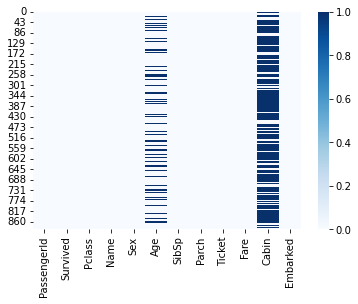

In [ ]:
#Heatmap is a graphical way to visualize visitor behavior data in the form of hot and cold spots employing 
#a warm-to-cool color scheme
sns.heatmap(t_train.isnull(), cmap="Blues")

# Explorating Data Analysis before preprocessing

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


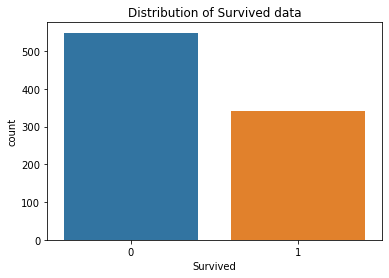

In [ ]:
#Plot of Survival column before data preprocessing
sns.countplot(t_train['Survived'])
plt.title('Distribution of Survived data')
plt.show()
#Distribution is good

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Pclass data')

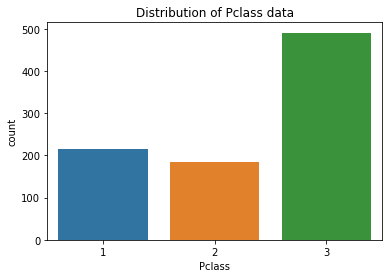

In [ ]:
# plot of pclass column (Ticket class) • 1=1st • 2=2nd • 3=3rd
sns.countplot(t_train['Pclass'])
plt.title('Distribution of Pclass data') #3rd class has more survival count

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


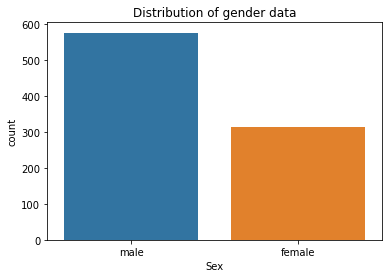

In [ ]:
#Plot of sex(male,female) column before data preprocessing
sns.countplot(t_train['Sex'])
plt.title('Distribution of gender data')
plt.show()

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


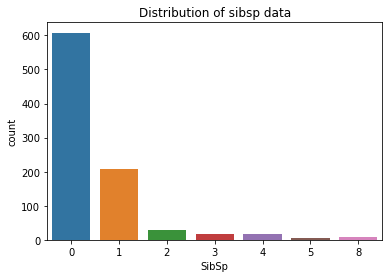

In [ ]:
#Plot of sibsp (# of siblings / spouses aboard the Titanic) column before data preprocessing
sns.countplot(t_train['SibSp'])
plt.title('Distribution of sibsp data')
plt.show()

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


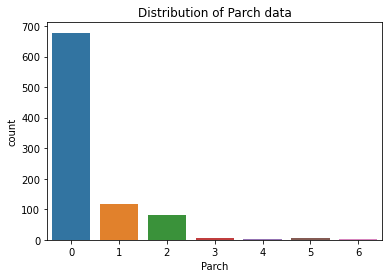

In [ ]:
#Plot of parch (# of parents / children aboard the Titanic) column before data preprocessing
sns.countplot(t_train['Parch'])
plt.title('Distribution of Parch data')
plt.show()

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


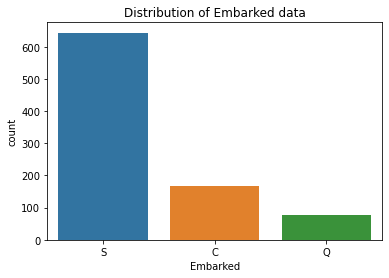

In [ ]:
# Embarked implies where the traveler mounted from
#Plot of embarked Port of Embarkation C = Cherbourg, Q = Queenstown,S = Southampton column before data preprocessing
sns.countplot(t_train['Embarked'])
plt.title('Distribution of Embarked data')
plt.show()
# #More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown

<AxesSubplot:xlabel='Survived', ylabel='count'>

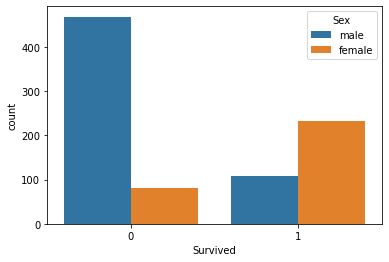

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=t_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

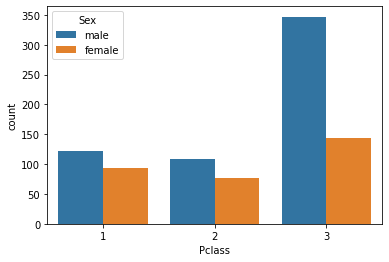

In [ ]:
sns.countplot(x='Pclass',hue='Sex',data=t_train)

# For Numerical Attributes

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

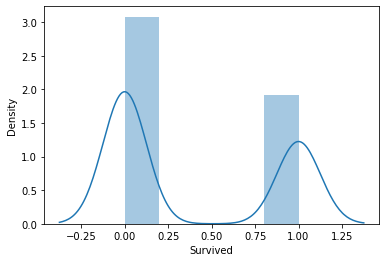

In [ ]:
#distplot represents the histogram with curve
sns.distplot(t_train['Survived'])

<function matplotlib.pyplot.show(close=None, block=None)>

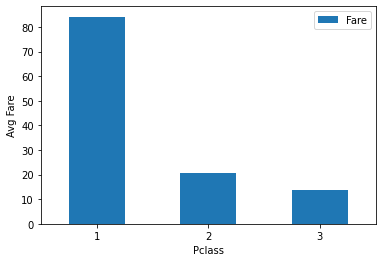

In [ ]:
#pivot is used as it by default do the mean for particular class
class_fare = t_train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

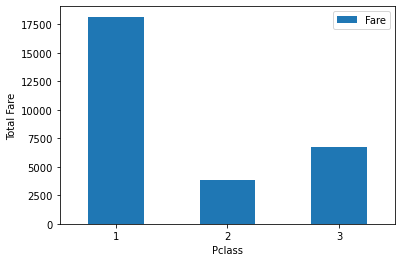

In [ ]:
class_fare =t_train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

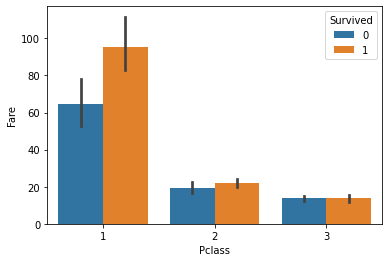

In [ ]:
sns.barplot(data=t_train,x='Pclass',y='Fare',hue='Survived')

# Data Preprocessing

In [ ]:
#Total rows in train dataset
train_len = len(t_train)
train_len

891

In [ ]:
#total rows in test dataset
test_len = len(t_test)
test_len

418

# Combine datasets

In [ ]:
#Combine datasets(train and test)
df = pd.concat([t_train,t_test],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Displaying the last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#reseting the index in new dataset
df = df.reset_index(drop=True)

In [ ]:
#Displaying the last 5 rows 
print('The last 5 rows of Test dataset')
df.tail()

The last 5 rows of Test dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Displaying no of rows and colmns in dataset
print('The number of rows and coluns are: ')
df.shape

The number of rows and coluns are: 


(1309, 12)

# Missing Data

In [ ]:
#Finding the Null values in new dataset
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# drop the cabin column from the dataset
df = df.drop(columns='Cabin',axis=1)

In [ ]:
#Replacing the missing value in 'Age' column with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
#Finding the mode value of 'Embarked' column
print(df['Embarked'].mode())

0    S
dtype: object


In [ ]:
print(df['Embarked'].mode()[0])

S


In [ ]:
#Replacing the missing value in 'embarked' column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
#again checking the missing values
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [ ]:
#Finding the number of people survived and not survived
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

# Data Visualization aftr preprocessing

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

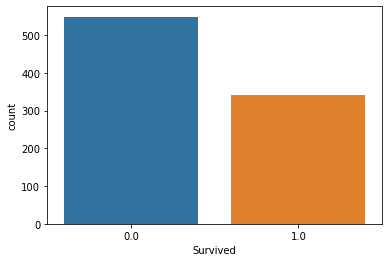

In [ ]:
#making a count plot for 'Survival' Column
sns.countplot('Survived', data=df)

In [ ]:
#Finding the number of people genderwise survived and not survived
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

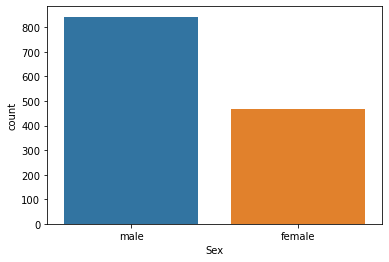

In [ ]:
#making a count plot for 'Sex' Column
sns.countplot('Sex', data=df)

/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

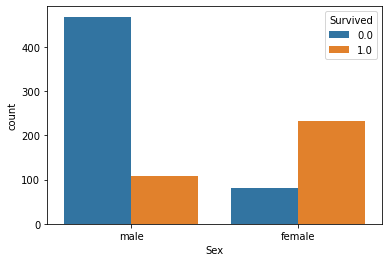

In [ ]:
#Number of survival genderwise
sns.countplot('Sex',hue='Survived', data=df)

In [ ]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

# Correlation matrix
A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

In [ ]:
#Correlation matrix
corr = df.corr()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#droping few columns
df = df.drop(columns=['Name','Ticket'],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

In [ ]:
for col in cols:
 df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


# Split the data for testing and validation

In [ ]:
#Train_test_split
train = df.iloc[ : train_len, : ]
test = df.iloc[ : test_len, : ]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [ ]:
#input split
X=train.drop(columns=['PassengerId','Survived'],axis=1)
Y=train['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# Model Training

In [ ]:
#Cross_val_score is a function in the scikit-learn package which trains and tests a model over 
#multiple folds of your dataset. This cross validation method gives you a better understanding of model 
#performance over the whole dataset instead of just a single train/test split
from sklearn.model_selection import train_test_split, cross_val_score
#classify column
def classify(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x , y , 
    test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy: ',model.score(x_test, y_test))
    score = cross_val_score(model, x , y , cv=5)
    print('CV Score: ',np.mean(score)) 

# Logistic Regression
Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy:  0.8071748878923767
CV Score:  0.786761659657272


/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roshinid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

# Decision Tree
A Decision Tree is a supervised learning algorithm. It is a graphical representation of all the possible solutions. All the decisions were made based on some conditions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X , Y)

Accuracy:  0.7443946188340808
CV Score:  0.7665997112547862


# Random Forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [ ]:
X_test = test.drop(columns=['PassengerId','Survived'],axis=1)

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
# to know model prediction in form of arrays
pred = model.predict(X_test)
pred

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X , Y)

Accuracy:  0.8161434977578476
CV Score:  0.8114744837110038


In [ ]:
# logistic Regression is the best fit with accuracy and cross validation score